In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv("Employee_Survey_Raw_Data.csv")

In [5]:
df.head()

,Executive,Company,Group_Layer,Culture,Career,Communication,Growth,Manager,Respect,Team,Satisfaction
0,Achim Plass,Pantheon,`03-04,4,3,4,3,3,4,4,3
1,Achim Plass,Pantheon,`03-04,2,3,2,4,3,3,4,3
2,Achim Plass,Pantheon,`03-04,3,5,5,5,5,5,5,5
3,Andreas Hargrove,Plexus,`03-04,4,3,5,4,5,5,3,2
4,Andreas Hargrove,Plexus,`03-04,4,4,4,4,2,4,4,4


In [6]:
df.shape

(174, 11)

In [7]:
df.Company.value_counts()

Sparta        39
BrightStar    36
Pantheon      33
Plexus        30
Cyberspace    24
Fluent        12
Name: Company, dtype: int64

In [8]:
df.describe()

,Culture,Career,Communication,Growth,Manager,Respect,Team,Satisfaction
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,4.022989,3.741379,3.810345,3.959770,4.178161,4.229885,4.137931,3.925287
std,0.973368,1.110543,1.016458,0.945688,1.079170,0.927439,0.914525,0.979645
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,4.000000,3.000000,3.000000,3.250000,4.000000,4.000000,4.000000,3.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


## Missing Value Treatment

In [9]:
# Replace -1 to Nan
df = df.replace([-1], np.nan)

In [10]:
# Replace Nan to the median value of the feature column
df = df.fillna(df.median())

In [11]:
df.isnull().sum()

Executive        0
Company          0
Group_Layer      0
Culture          0
Career           0
Communication    0
Growth           0
Manager          0
Respect          0
Team             0
Satisfaction     0
dtype: int64

In [12]:
df.describe()

,Culture,Career,Communication,Growth,Manager,Respect,Team,Satisfaction
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,4.051724,3.770115,3.839080,3.988506,4.235632,4.258621,4.166667,3.954023
std,0.894862,1.050198,0.948056,0.866783,0.922860,0.837565,0.826465,0.904811
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


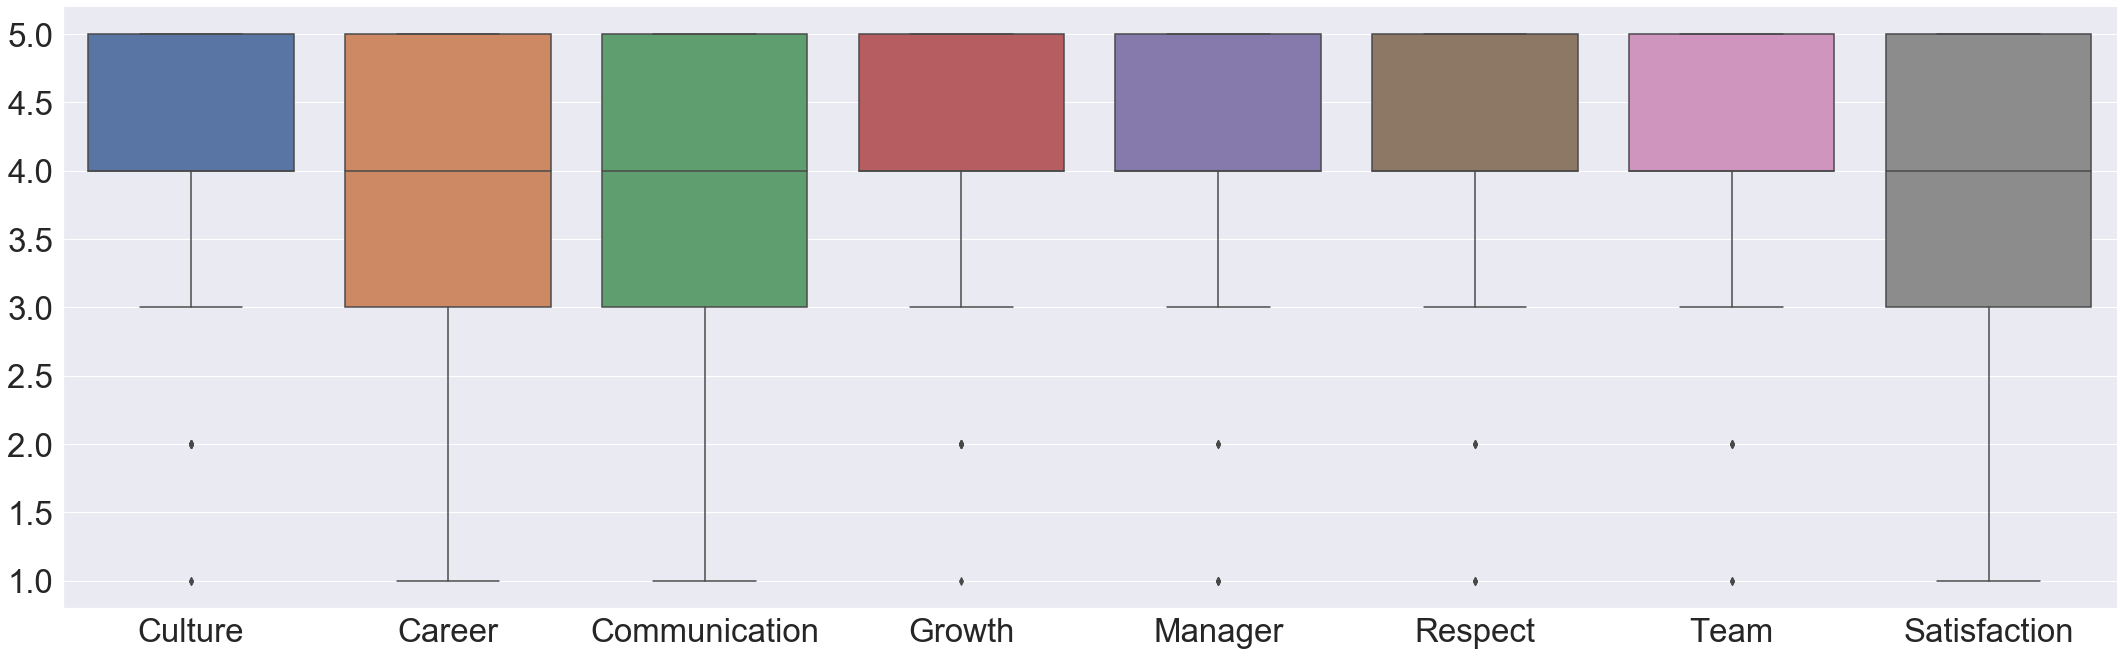

In [266]:
sns.set(font_scale=3)
sns.catplot(data=df,kind='box',height=10,aspect=3)

## Relationship Analysis

In [14]:
corr = df.corr()
corr

,Culture,Career,Communication,Growth,Manager,Respect,Team,Satisfaction
Culture,1.000000,0.338714,0.418672,0.336122,0.356126,0.467919,0.496303,0.495548
Career,0.338714,1.000000,0.392246,0.765428,0.342491,0.514843,0.390705,0.518042
Communication,0.418672,0.392246,1.000000,0.356476,0.294643,0.409409,0.270500,0.395634
Growth,0.336122,0.765428,0.356476,1.000000,0.364714,0.489804,0.381932,0.478392
Manager,0.356126,0.342491,0.294643,0.364714,1.000000,0.541399,0.440827,0.463009
Respect,0.467919,0.514843,0.409409,0.489804,0.541399,1.000000,0.546956,0.595465
Team,0.496303,0.390705,0.270500,0.381932,0.440827,0.546956,1.000000,0.566856
Satisfaction,0.495548,0.518042,0.395634,0.478392,0.463009,0.595465,0.566856,1.000000


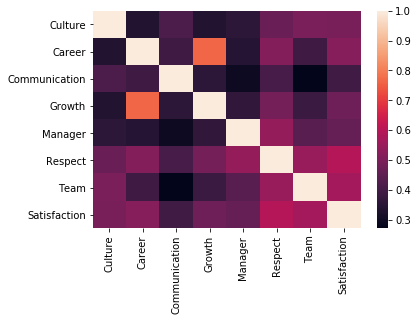

In [15]:
sns.heatmap(corr)

In [268]:
from sklearn import linear_model

X = df[['Culture','Career','Communication','Growth','Manager','Respect','Team']]
y = df['Satisfaction']

regr = linear_model.LinearRegression()
regr.fit(X, y)

print("Coefficients: " ,regr.coef_)
print("Intercept: ", regr.intercept_)
print("R Squared Value: ", regr.score(X,y))

Coefficients:  [0.14393909 0.15266178 0.07166857 0.04401203 0.09846918 0.2195831
 0.25739613]
Intercept:  -0.0800988377905143
R Squared Value:  0.5130276063085571


In [254]:
df.pivot_table(index='Company', aggfunc='mean')

,Career,Communication,Culture,Growth,Manager,Respect,Satisfaction,Team
Company,,,,,,,,
BrightStar,3.416667,3.527778,4.000000,3.777778,3.916667,4.055556,3.777778,3.916667
Cyberspace,3.791667,4.208333,3.916667,3.916667,4.291667,4.250000,4.125000,4.083333
Fluent,3.750000,3.416667,4.333333,4.166667,4.416667,4.583333,4.166667,4.333333
Pantheon,3.757576,3.939394,4.181818,3.909091,4.151515,4.393939,4.121212,4.484848
Plexus,3.733333,3.800000,3.933333,3.966667,4.333333,4.066667,3.600000,4.000000
Sparta,4.128205,3.974359,4.076923,4.256410,4.435897,4.384615,4.076923,4.256410


In [260]:
df.mean()

Culture          4.051724
Career           3.770115
Communication    3.839080
Growth           3.988506
Manager          4.235632
Respect          4.258621
Team             4.166667
Satisfaction     3.954023
dtype: float64

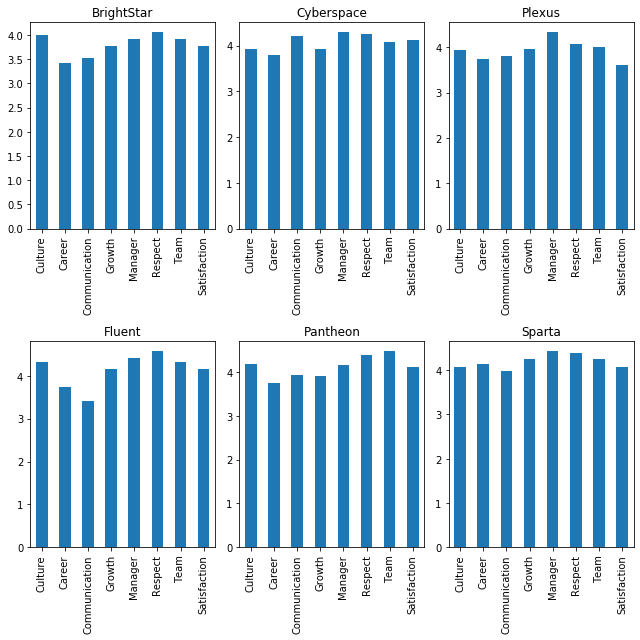

In [180]:
fig,ax = plt.subplots(2,3, figsize=(9,9))                
df[df['Company'] == 'BrightStar'].mean().plot(kind='bar', title='BrightStar', ax = ax[0,0])
df[df['Company'] == 'Cyberspace'].mean().plot(kind='bar', title='Cyberspace',ax = ax[0,1])
df[df['Company'] == 'Fluent'].mean().plot(kind='bar', title='Fluent',ax = ax[1,0])
df[df['Company'] == 'Pantheon'].mean().plot(kind='bar', title='Pantheon',ax = ax[1,1])
df[df['Company'] == 'Plexus'].mean().plot(kind='bar', title='Plexus',ax = ax[0,2])
df[df['Company'] == 'Sparta'].mean().plot(kind='bar', title='Sparta',ax = ax[1,2])


plt.tight_layout()
plt.show()

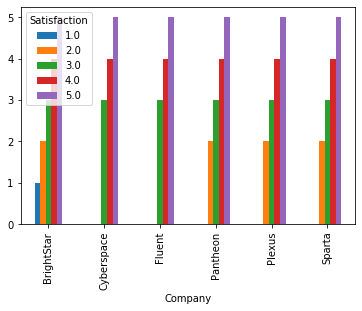

In [81]:
pd.crosstab(columns=[df.Satisfaction], index=[df.Company], values=df.Satisfaction, aggfunc='mean').plot(kind='bar')